## Task 3.2

This notebook contains tests and results related to Task 3.2

 For all algorithms as performance measure use Balanced Accuracy. The models should be trained
 on training set. The performance measure should be calculated on test set. Please average the results
 over at least 5 train-test splits. If the given algorithm does not converge, within 500 iterations, stop the
 algorithm and use the solutions from the last iteration.

In [1]:
import numpy as np
import pandas as pd
from models import IRLS
from models import SGD
from models import ADAM
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
import datasets.read as data
from matplotlib import pyplot as plt
import seaborn as sns

splits = np.arange(0.1, 0.55, 0.05)

def test_balanced_accuracy(X, y, splits, dataset_name):
  irls_acc = []
  sgd_acc = []
  adam_acc = []

  for split in splits:
    print(f'Test size: {split:.2f}')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, stratify=y)
    irls = IRLS()
    sgd = SGD()
    adam = ADAM()
    irls.fit(X_train, y_train)
    sgd.fit(X_train, y_train)
    adam.fit(X_train, y_train)
    y_pred_irls = irls.predict(X_test)
    y_pred_sgd = sgd.predict(X_test)
    y_pred_adam = adam.predict(X_test)
    irls_acc.append(balanced_accuracy_score(y_test, y_pred_irls))
    sgd_acc.append(balanced_accuracy_score(y_test, y_pred_sgd))
    adam_acc.append(balanced_accuracy_score(y_test, y_pred_adam))

  df = pd.DataFrame({'IRLS': irls_acc, 'SGD': sgd_acc, 'ADAM': adam_acc})
  test_csv_file = 'task3.2_results/'+ dataset_name +'_history.csv'
  with open(test_csv_file, mode='w') as f:
        df.to_csv(f)
  return df

def plt_boxplots(df, dataset_name):
  plt.boxplot(df, labels=df.columns)
  plt.title(f'Balanced Accuracy on dataset {dataset_name}')
  plt.ylabel('Balanced Accuracy');

## 1. Rice Cammeo Osmancik

In [2]:
dataset = 'Rice Cammeo Osmancik'
X, y = data.read_Rice_Cammeo_Osmancik("datasets/")
# test1 = test_balanced_accuracy(X, y, splits, dataset)
# plt_boxplots(test1, dataset)

Removing feature Area with VIF 1170.5290948102754
Removing feature Convex_Area with VIF 331.7922804059602
Removing feature Major_Axis_Length with VIF 128.653727424773
Removing feature Perimeter with VIF 43.91958454609174


## 2. Statlog (Shuttle)

In [3]:
dataset = 'Statlog (Shuttle)'
X, y = data.read_Statlog_Shuttle("datasets/")
# test2 = test_balanced_accuracy(X, y, splits, dataset)
# plt_boxplots(test2, dataset)

Removing feature 7.0 with VIF 1534.8004400464135
Removing feature 8.0 with VIF 894.6501920533506
Removing feature 6.0 with VIF 604.041680510662


## 3. Banknote authentication

In [4]:
dataset = 'Banknote authentication'
X, y = data.read_Banknote_Authentication("datasets/")
# test3 = test_balanced_accuracy(X, y, splits, dataset)
# plt_boxplots(test3, dataset)

## 4. Online Shoppers Purchasing Intention Dataset

In [2]:
dataset = 'Online Shoppers Purchasing Intention'
X, y = data.read_Online_Shoppers_intention("datasets/")
# test4 = test_balanced_accuracy(X, y, splits, dataset)
# plt_boxplots(test4, dataset)

## 5. EEG Eye State

In [3]:
dataset = 'EEG Eye State'
X, y = data.read_EEG_Eye_State("datasets/")
# X.shape
# test5 = test_balanced_accuracy(X, y, splits, dataset)
# plt_boxplots(test5, dataset)

Removing feature AF4 with VIF 82797.14753361203
Removing feature O1 with VIF 76679.61011990067
Removing feature AF3 with VIF 20969.21139044613
Removing feature F8 with VIF 3630.64079221382
Removing feature F4 with VIF 28.54748352345858
Removing feature T8 with VIF 13.052551855093366
Removing feature F3 with VIF 12.792383185747669


## 6. Web Page Phishing Dataset

In [4]:
dataset = 'Web Page Phishing'
X, y = data.read_Web_Page_Phishing("datasets/")
fraction = int(X.shape[0]*0.5)
# test6 = test_balanced_accuracy(X[:fraction], y[:fraction], np.arange(0.3, 0.55, 0.05), dataset)
# plt_boxplots(test6, dataset)

## 7. Airline Satisfaction Dataset

In [5]:
dataset = 'Airline Satisfaction'
X, y = data.read_Airline_Passenger_Satisfaction("datasets/")
fraction = int(X.shape[0]*0.5)
# test7 = test_balanced_accuracy(X[:fraction], y[:fraction], np.arange(0.3, 0.55, 0.05), dataset)
# plt_boxplots(test7, dataset)

Removing feature Arrival Delay in Minutes with VIF 14.682176785346995


## 8. Dataset for Link Phishing

In [6]:
dataset = 'Dataset for Link Phishing'
X, y = data.read_Dataset_for_Link_Phishing("datasets/")
# test8 = test_balanced_accuracy(X, y, splits, dataset)
# plt_boxplots(test8, dataset)

c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 -

Removing feature longest_word_path with VIF 100.85611460173716


c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 -

Removing feature length_words_raw with VIF 67.31691755162821


c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 -

Removing feature avg_word_host with VIF 47.75793627615214


c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 -

Removing feature avg_words_raw with VIF 16.144176662597598


c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 -

Removing feature total_of= with VIF 12.968747084725525


c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 -

Removing feature url_length with VIF 9.4388269935851


c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 -

Removing feature ratio_intHyperlinks with VIF 6.282765181945691


c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 -

## 9. Optdigits

In [7]:
dataset = 'Optdigits'
X, y = data.read_Optdigits("datasets/")
# test9 = test_balanced_accuracy(X, y, splits, dataset)
# plt_boxplots(test9, dataset)

c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input3 with VIF 9.240420213677252


c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input62 with VIF 6.095812653084993


c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input43 with VIF 5.270787253168077


c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input55 with VIF 5.1668902585468475


c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input15 with VIF 5.125767038649418


c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\ProgramFiles\Anaconda3\envs\tensorflow\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


## Combined results

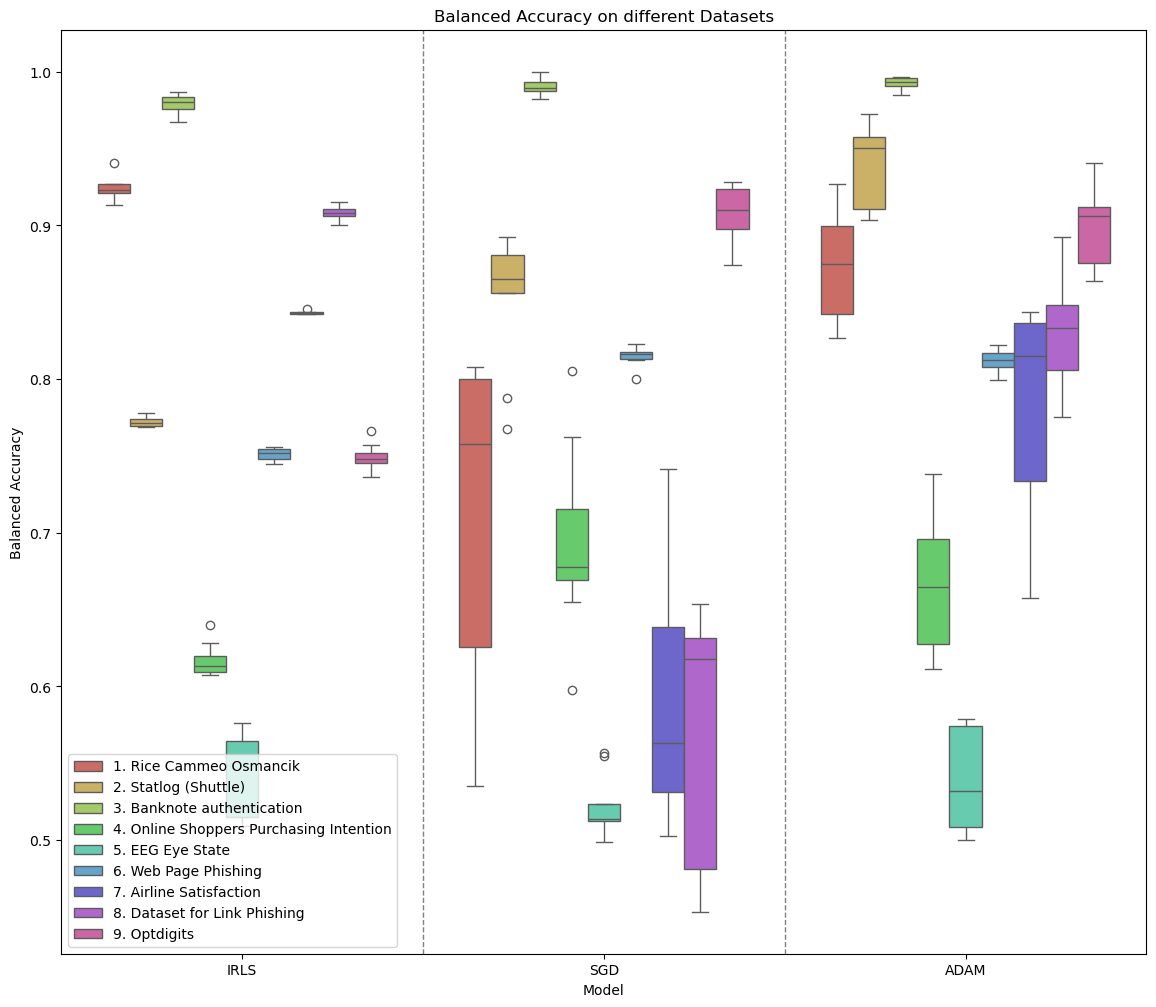

In [14]:
df1 = pd.read_csv('task3.2_results/Rice Cammeo Osmancik_history.csv', index_col=0)
df2 = pd.read_csv('task3.2_results/Statlog (Shuttle)_history.csv', index_col=0)
df3 = pd.read_csv('task3.2_results/Banknote authentication_history.csv', index_col=0)
df4 = pd.read_csv('task3.2_results/Online Shoppers Purchasing Intention_history.csv', index_col=0)
df5 = pd.read_csv('task3.2_results/EEG Eye State_history.csv', index_col=0)
df6 = pd.read_csv('task3.2_results/Web Page Phishing_history.csv', index_col=0)
df7 = pd.read_csv('task3.2_results/Airline Satisfaction_history.csv', index_col=0)
df8 = pd.read_csv('task3.2_results/Dataset for Link Phishing_history.csv', index_col=0)
df9 = pd.read_csv('task3.2_results/Optdigits_history.csv', index_col=0)

# Add a column to each dataframe to indicate dataframe source
df1['Source'] = '1. Rice Cammeo Osmancik'
df2['Source'] = '2. Statlog (Shuttle)'
df3['Source'] = '3. Banknote authentication'
df4['Source'] = '4. Online Shoppers Purchasing Intention'
df5['Source'] = '5. EEG Eye State'
df6['Source'] = '6. Web Page Phishing'
df7['Source'] = '7. Airline Satisfaction'
df8['Source'] = '8. Dataset for Link Phishing'
df9['Source'] = '9. Optdigits'

# Concatenate dataframes
combined_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9])

# Melt the dataframe to have 'variable' and 'value' columns
melted_df = pd.melt(combined_df, id_vars='Source', var_name='Column', value_name='Balanced Accuracy')

# Create boxplot
plt.figure(figsize=(14, 12))
ax = sns.boxplot(x='Column', y='Balanced Accuracy', hue='Source', data=melted_df, palette='hls')
# Draw dashed lines as separators between columns
num_columns = len(combined_df.columns) - 1  # Excluding the 'Source' column
for i in range(num_columns - 1):
  plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=1)

plt.title('Balanced Accuracy on different Datasets')
plt.xlabel('Model')
plt.ylabel('Balanced Accuracy')
plt.legend(loc='lower left')
plt.show()

In [15]:
dfg1 = df1.groupby('Source').mean()
dfg2 = df2.groupby('Source').mean()
dfg3 = df3.groupby('Source').mean()
dfg4 = df4.groupby('Source').mean()
dfg5 = df5.groupby('Source').mean()
dfg6 = df6.groupby('Source').mean()
dfg7 = df7.groupby('Source').mean()
dfg8 = df8.groupby('Source').mean()
dfg9 = df9.groupby('Source').mean()
combined_df = pd.concat([dfg1, dfg2, dfg3, dfg4, dfg5, dfg6, dfg7, dfg8, dfg9])
combined_df['IRLS']  *= 100
combined_df['SGD'] *= 100
combined_df['ADAM'] *= 100
combined_df.round(2)

,IRLS,SGD,ADAM
Source,,,
1. Rice Cammeo Osmancik,92.41,70.48,87.59
2. Statlog (Shuttle),77.19,85.35,94.08
3. Banknote authentication,97.93,99.07,99.22
4. Online Shoppers Purchasing Intention,61.73,69.65,66.78
5. EEG Eye State,53.84,52.10,53.84
6. Web Page Phishing,75.11,81.42,81.19
7. Airline Satisfaction,84.32,59.26,78.02
8. Dataset for Link Phishing,90.82,56.15,83.16
9. Optdigits,74.90,90.83,89.94
